In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
from math import pi
import scipy.stats
  
# 37 hilos
df_1 = pd.read_csv("./resultados_esc1.jtl") 
# 61 hilos
df_2 = pd.read_csv("./resultados_esc2.jtl") 
# 139 hilos
df_3 = pd.read_csv("./resultados_esc3.jtl") 

stationaryPeriod = 600
startTime = 10*1000
endTime = stationaryPeriod*1000

firstTimestamp = df_1.iloc[0]['timeStamp']
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) > (firstTimestamp + startTime)]
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) <= (firstTimestamp + startTime + endTime)]
df_1_elapsed = df_1['elapsed']

firstTimestamp = df_2.iloc[0]['timeStamp']
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) > (firstTimestamp + startTime)]
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) <= (firstTimestamp + startTime + endTime)]
df_2_elapsed = df_2['elapsed']

firstTimestamp = df_3.iloc[0]['timeStamp']
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) > (firstTimestamp + startTime)]
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) <= (firstTimestamp + startTime + endTime)]
df_3_elapsed = df_3['elapsed']



In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [3]:
def getRow(data, hilos):
    minResponseTime = data.min()
    maxResponseTime = data.max()
    meanResponseTime = data.mean()
    medianResponseTime = data.median()
    modeResponseTime = data.mode()
    totalTime = data.sum()

    std = data.std(ddof=0)

    rango = data.max() - data.min()
    iqr = data.quantile(0.75) - data.quantile(0.25)

    numRequest = data.size
    throughput = (numRequest/stationaryPeriod)
    potencia = (throughput/meanResponseTime)
    confidence_interval = mean_confidence_interval(data)
    
    return [hilos, minResponseTime, maxResponseTime, meanResponseTime, medianResponseTime, std, numRequest, throughput, potencia, rango, iqr, confidence_interval];


In [4]:
data = [ getRow(df_1_elapsed, 37), getRow(df_2_elapsed, 61), getRow(df_3_elapsed, 139) ];

columns = ['N. hilos', 'Min', 'Max', 'Media', 'Mediana', 'Desv. estandar', 'N. Peticiones', 'Throughput', 'Potencia', 'Rango', 'IQR', 'Mean Confidence Interval']
  
keys = ['37 hilos', '61 hilos', '139 hilos']

df = pd.DataFrame(data, columns = columns, index = keys) 
df 

N. hilos  Min    Max       Media  Mediana  Desv. estandar  \
37 hilos         37   11   1599   59.188278     30.0      108.060771   
61 hilos         61   11  13715   95.381456     31.0      296.915123   
139 hilos       139   11  29990  184.335120     38.0      528.553186   

           N. Peticiones  Throughput  Potencia  Rango   IQR  \
37 hilos           33031   55.051667  0.930111   1588  28.0   
61 hilos           53149   88.581667  0.928710  13704  33.0   
139 hilos         114380  190.633333  1.034167  29979  63.0   

                          Mean Confidence Interval  
37 hilos   (58.022870248128044, 60.35368510896075)  
61 hilos     (92.8571217881705, 97.90579002578647)  
139 hilos  (181.27196998953812, 187.3982695628312)

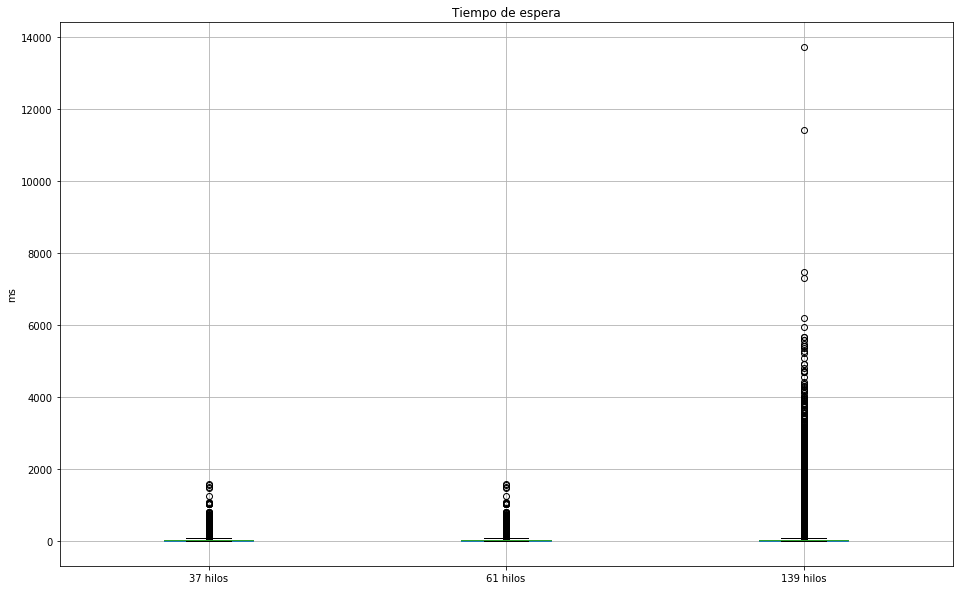

In [5]:
allDf = pd.concat(
    [df_1_elapsed, df_1_elapsed,
    df_2_elapsed, df_2_elapsed,
    df_3_elapsed, df_3_elapsed], axis = 1, keys=keys)
bplot = allDf.boxplot(column=keys, figsize=(16,10))
bplot.set_ylabel('ms')
bplot.set_title('Tiempo de espera')

plt.show()


Text(0, 0.5, 'tps')

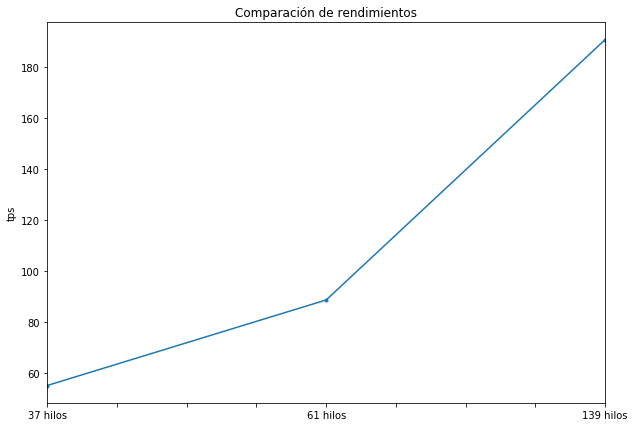

In [6]:
df_1_throughput = df.iloc[[0]].reset_index()['Throughput'];
df_2_throughput = df.iloc[[1]].reset_index()['Throughput'];
df_3_throughput = df.iloc[[2]].reset_index()['Throughput'];

dfLines = pd.concat([df_1_throughput, df_2_throughput, df_3_throughput], axis=1)
dfLines.columns = keys
ax = df['Throughput'].plot(title = 'Comparación de rendimientos', style = '.-', figsize=(10, 7))
ax.set_ylabel("tps")

Text(0, 0.5, 'ms')

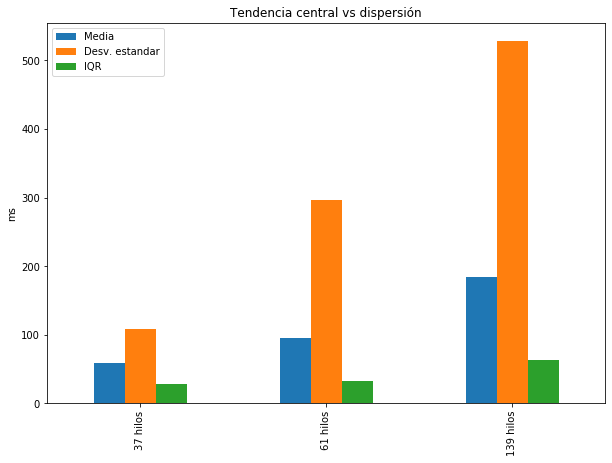

In [7]:
columns = ['Media', 'Desv. estandar', 'IQR']
dfBar = df[columns]
ax = dfBar.plot(title = 'Tendencia central vs dispersión', kind = 'bar', figsize=(10, 7))
ax.set_ylabel("ms")

Text(0, 0.5, 'ms')

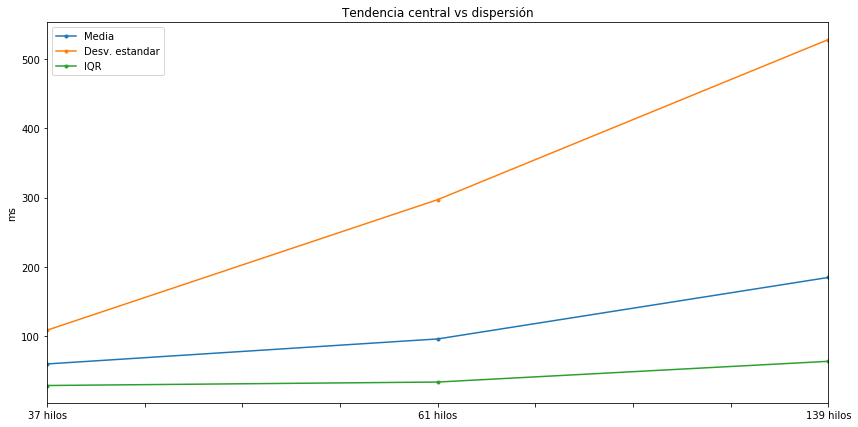

In [8]:
ax = dfBar.plot(title = 'Tendencia central vs dispersión', style = '.-', figsize=(14, 7))
ax.set_ylabel("ms")

In [9]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [10]:
df_perf_1 = pd.read_csv("./log_perfmon_1.csv") 
df_perf_2 = pd.read_csv("./log_perfmon_2.csv") 
df_perf_3 = pd.read_csv("./log_perfmon_3.csv") 

firstTimestamp = df_perf_1.iloc[0]['timeStamp']
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) > (firstTimestamp + startTime)]
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_2.iloc[0]['timeStamp']
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) > (firstTimestamp + startTime)]
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_3.iloc[0]['timeStamp']
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) > (firstTimestamp + startTime)]
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) <= (firstTimestamp + startTime + endTime)]


df_disk_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(1000)
df_swap_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Swap used']['elapsed'].div(1000)
df_mem_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es CPU combined']['elapsed'].div(1000)

df_disk_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(1000)
df_swap_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Swap used']['elapsed'].div(1000)
df_mem_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es CPU combined']['elapsed'].div(1000)

df_disk_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(1000)
df_swap_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Swap used']['elapsed'].div(1000)
df_mem_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es CPU combined']['elapsed'].div(1000)


In [11]:
def getPerfmonRow(data, escenario, usuarios):
    disk = data[data['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
    swap = data[data['label'] == 'virtual.lab.inf.uva.es Swap used']['elapsed']
    memory = data[data['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
    cpu = data[data['label'] == 'virtual.lab.inf.uva.es CPU combined']['elapsed']
    
    meanDisk = disk.mean()
    meanSwap = swap.mean() / 1000
    meanMemory = memory.mean() / 1000
    meanCpu = cpu.mean() / 1000
    
    return [escenario, usuarios, meanCpu, meanMemory, meanSwap, meanDisk];

In [12]:
data = [
    getPerfmonRow(df_perf_1, 1, 37),
    getPerfmonRow(df_perf_2, 2, 61),
    getPerfmonRow(df_perf_3, 3, 139),
];

columns = ['Escenario', 'Usuarios', 'CPU', 'Memory', 'Swap', 'Disk']
  
df = pd.DataFrame(data, columns = columns, index = keys) 
  
df

Escenario  Usuarios        CPU     Memory       Swap       Disk
37 hilos           1        37  12.823958  27.428569  7376896.0  29.743633
61 hilos           2        61  20.418573  31.514403  7376896.0   8.637288
139 hilos          3       139  42.476672  43.972003  7376896.0  28.190153

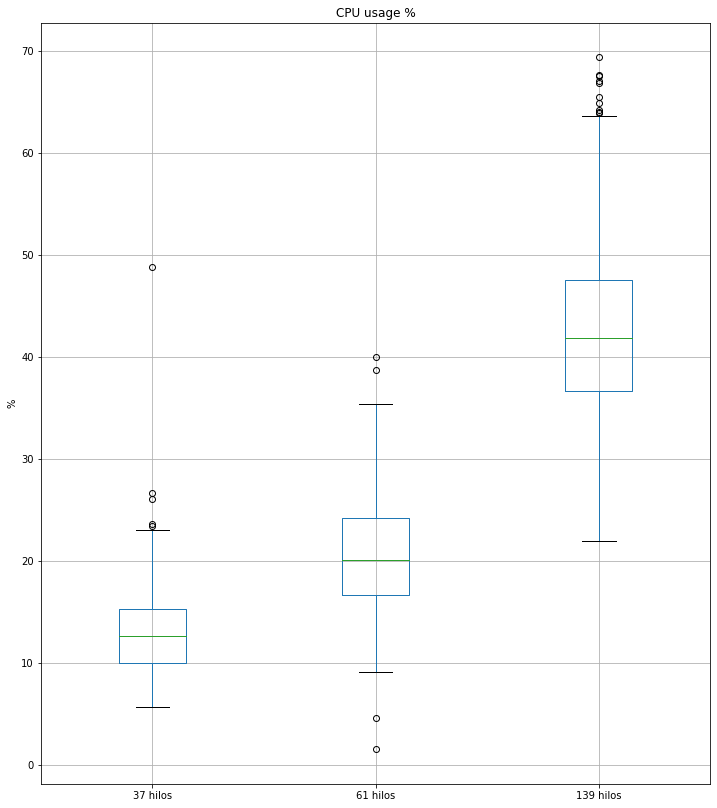

In [13]:
allDf = pd.concat([df_cpu_1, df_cpu_2, df_cpu_3], axis=1, keys=keys)
bplot = allDf.boxplot(
    column=keys,
    labels=keys,
    vert=True,
    figsize=(12,14)
)
bplot.set_ylabel('%')
plt.title('CPU usage %')

plt.show()

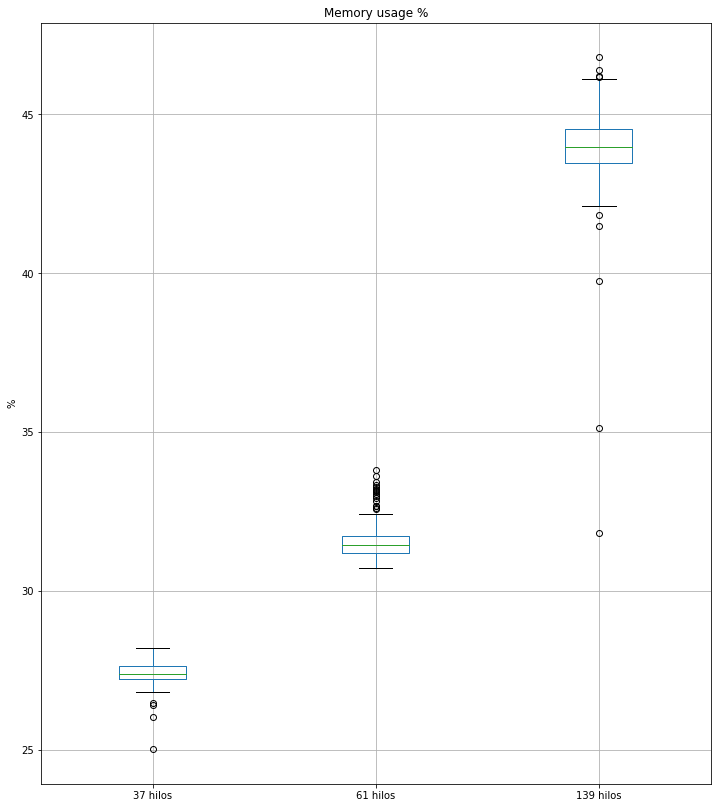

In [14]:
allDf = pd.concat([df_mem_1, df_mem_2, df_mem_3], axis=1, keys=keys)
bplot = allDf.boxplot(
    column=keys,
    labels=keys,
    vert=True,
    figsize=(12,14)
)
bplot.set_ylabel('%')
plt.title('Memory usage %')

plt.show()

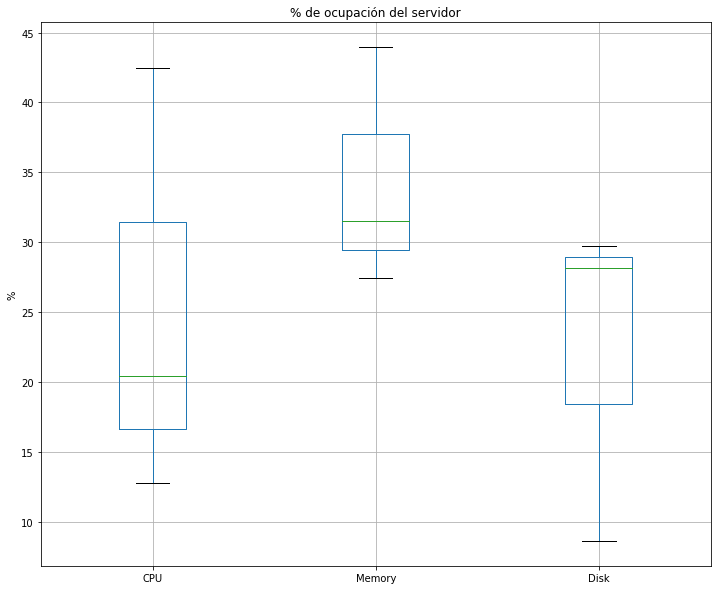

Text(0, 0.5, '%')

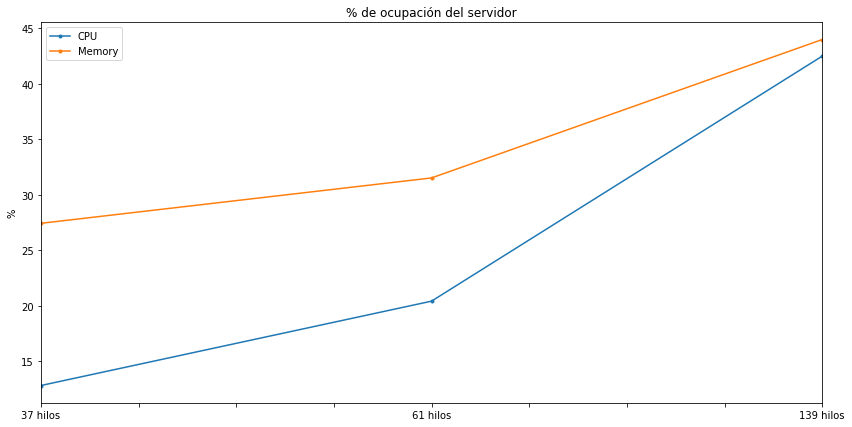

In [15]:
bplot = df.boxplot(
    column=['CPU', 'Memory', 'Disk'],
    labels=['CPU', 'Memory', 'Disk'],
    vert=True,
    figsize=(12,10)
)
bplot.set_ylabel('%')
plt.title('% de ocupación del servidor')
plt.show()

columns = ['CPU', 'Memory']
dfLines = df[columns]
ax = dfLines.plot(title = '% de ocupación del servidor', style = '.-', figsize=(14, 7))
ax.set_ylabel("%")